Restaurent Order Analysis

We have two flat files to analyze : orders.csv and menu_items.csv. We need to use both to answer the following questions

1. What items drive the most and least revenue?
2. Which time periods have the highest and lowest revenue?

Impoerting the Orders File

In [4]:
import pandas as pd
orders_df = pd.read_csv("order_details.csv", parse_dates=["order_date"])
orders_df.head()

C:\Users\Rano\AppData\Local\Temp\ipykernel_3196\627599217.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders_df = pd.read_csv("order_details.csv", parse_dates=["order_date"])


,order_details_id,order_id,order_date,order_time,item_id
0,1,1,2023-01-01,11:38:36 AM,109.0
1,2,2,2023-01-01,11:57:40 AM,108.0
2,3,2,2023-01-01,11:57:40 AM,124.0
3,4,2,2023-01-01,11:57:40 AM,117.0
4,5,2,2023-01-01,11:57:40 AM,129.0


In [5]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12234 entries, 0 to 12233
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  12234 non-null  int64         
 1   order_id          12234 non-null  int64         
 2   order_date        12234 non-null  datetime64[ns]
 3   order_time        12234 non-null  object        
 4   item_id           12097 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 478.0+ KB


Claening Up missing Rows

In [7]:
orders_df = orders_df.dropna()

In [9]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12097 entries, 0 to 12233
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  12097 non-null  int64         
 1   order_id          12097 non-null  int64         
 2   order_date        12097 non-null  datetime64[ns]
 3   order_time        12097 non-null  object        
 4   item_id           12097 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 567.0+ KB


Join Menu Items table

In [11]:
menu_df = pd.read_csv("menu_items.csv")

menu_df.head()

,menu_item_id,item_name,category,price
0,101,Hamburger,American,12.95
1,102,Cheeseburger,American,13.95
2,103,Hot Dog,American,9.00
3,104,Veggie Burger,American,10.50
4,105,Mac & Cheese,American,7.00


In [12]:
menu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   menu_item_id  32 non-null     int64  
 1   item_name     32 non-null     object 
 2   category      32 non-null     object 
 3   price         32 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


In [14]:
order_items_df = orders_df.merge(menu_df, how="left", left_on="item_id", right_on="menu_item_id").drop("menu_item_id", axis=1)
order_items_df.head()

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price
0,1,1,2023-01-01,11:38:36 AM,109.0,Korean Beef Bowl,Asian,17.95
1,2,2,2023-01-01,11:57:40 AM,108.0,Tofu Pad Thai,Asian,14.50
2,3,2,2023-01-01,11:57:40 AM,124.0,Spaghetti,Italian,14.50
3,4,2,2023-01-01,11:57:40 AM,117.0,Chicken Burrito,Mexican,12.95
4,5,2,2023-01-01,11:57:40 AM,129.0,Mushroom Ravioli,Italian,15.50


Adding Tax & Total revenue Columns

In [19]:
order_items_df["sales_tax"] = (order_items_df.price * .08).round(2)
order_items_df["total_revenue"] = order_items_df.price + order_items_df.sales_tax

order_items_df.head()

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price,sales_tax,total_revenue
0,1,1,2023-01-01,11:38:36 AM,109.0,Korean Beef Bowl,Asian,17.95,1.44,19.39
1,2,2,2023-01-01,11:57:40 AM,108.0,Tofu Pad Thai,Asian,14.50,1.16,15.66
2,3,2,2023-01-01,11:57:40 AM,124.0,Spaghetti,Italian,14.50,1.16,15.66
3,4,2,2023-01-01,11:57:40 AM,117.0,Chicken Burrito,Mexican,12.95,1.04,13.99
4,5,2,2023-01-01,11:57:40 AM,129.0,Mushroom Ravioli,Italian,15.50,1.24,16.74


In [20]:
order_items_df.describe()

,order_details_id,order_id,order_date,item_id,price,sales_tax,total_revenue
count,12097.000000,12097.000000,12097,12097.000000,12097.000000,12097.000000,12097.000000
mean,6118.950897,2692.569149,2023-02-14 11:17:33.781929216,115.202282,13.161767,1.055128,14.216895
min,1.000000,1.000000,2023-01-01 00:00:00,101.000000,5.000000,0.400000,5.400000
25%,3064.000000,1353.000000,2023-01-23 00:00:00,107.000000,10.500000,0.840000,11.340000
50%,6119.000000,2711.000000,2023-02-14 00:00:00,114.000000,13.950000,1.120000,15.070000
75%,9175.000000,4020.000000,2023-03-09 00:00:00,123.000000,16.500000,1.320000,17.820000
max,12234.000000,5370.000000,2023-03-31 00:00:00,132.000000,19.950000,1.600000,21.550000
std,3531.337208,1545.826452,NaN,9.387580,3.986392,0.320078,4.306466


Analyze Best & Worst Selling Items

In [21]:
order_items_df.groupby("item_name").agg({"total_revenue":"sum"})

,total_revenue
item_name,
California Roll,4583.05
Cheese Lasagna,3465.18
Cheese Quesadillas,2642.22
Cheeseburger,8785.81
Chicken Burrito,6365.45
Chicken Parmesan,7057.96
Chicken Tacos,1587.93
Chicken Torta,4892.89
Chips & Guacamole,2303.64


In [23]:
order_items_df.groupby("item_name").agg({"total_revenue":"sum"}).sort_values("total_revenue")

,total_revenue
item_name,
Chicken Tacos,1587.93
Potstickers,1992.60
Chips & Guacamole,2303.64
Hot Dog,2498.04
Cheese Quesadillas,2642.22
Veggie Burger,2698.92
Steak Tacos,3224.98
Edamame,3348.00
Cheese Lasagna,3465.18


<Axes: ylabel='item_name'>

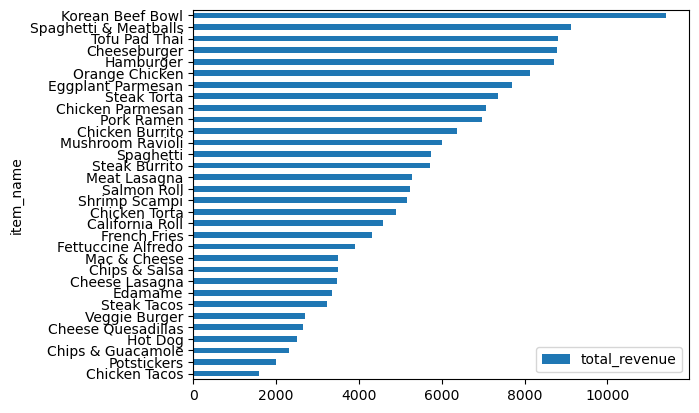

In [24]:
(order_items_df
 .groupby("item_name")
 .agg({"total_revenue":"sum"})
 .sort_values("total_revenue")
 .plot
 .barh()
)

Analyzing Busiest Times

C:\Users\Rano\AppData\Local\Temp\ipykernel_3196\1347813110.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  order_items_df.set_index("order_date").resample("M")["total_revenue"].sum().plot(ylim=0)


<Axes: xlabel='order_date'>

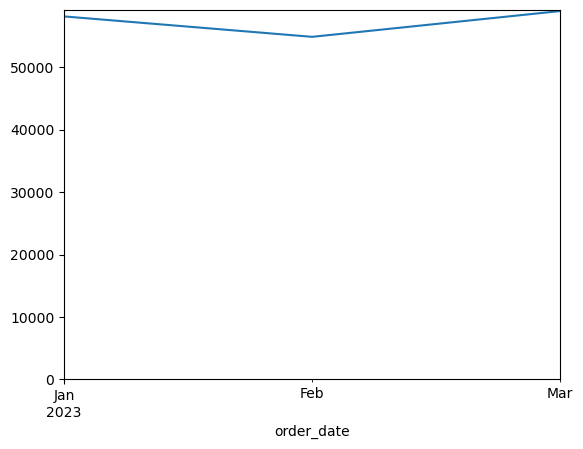

In [28]:
order_items_df.set_index("order_date").resample("M")["total_revenue"].sum().plot(ylim=0)